In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### [연습문제 4-1]

- np.arange(12).reshape(3,4)를 사용해 3 x 4 행렬 생성
- 파이썬 코드를 작성해 두 번째 행, 네 번째 열의 원소 추출
- 다른 행과 열 인덱스를 선택할 수 있도록 소프트 코딩하고,
- 'The matrix element at (2,4) is 7.' 과 같은 메시지 출력

In [5]:
matrix = np.arange(12).reshape(3, 4)

# 두 번째 행, 네 번째 열의 원소
print(matrix[1,3])

7


In [6]:
# 행과 열 인덱스 input
row = int(input("행 인덱스: "))
col = int(input("열 인덱스: "))
print('The matrix element at ({},{}) is {}'.format(row, col, matrix[row-1, col-1]))

The matrix element at (2,4) is 7


#### [연습문제 4-2]

- 0~99까지 있는 10x10 행렬 만들기(행렬 C)
- 슬라이싱을 사용해 처음 5개의 행과 5개의 열로 이루어진 하위 행렬 추출(행렬 C1)
- 시각화 해보기

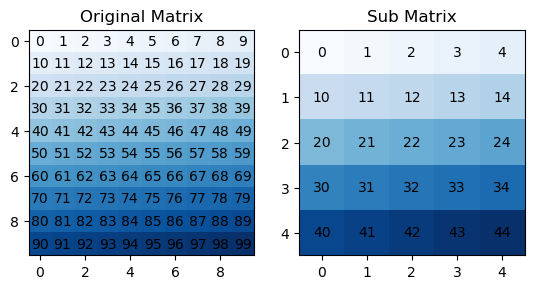

In [10]:
matrix = np.arange(100).reshape(10,10)
sub = matrix[0:5, 0:5]

# matrix와 sub 시각화
plt.subplot(121)
plt.imshow(matrix, cmap='Blues', interpolation='nearest')
plt.title('Original Matrix')
# 칸 안에 레이블 달아주기
for i in range(10):
    for j in range(10):
        plt.text(j, i, matrix[i, j], ha='center', va='center', color='black')
plt.subplot(122)
plt.imshow(sub, cmap='Blues', interpolation='nearest')
plt.title('Sub Matrix')
# 칸 안에 레이블 달아주기
for i in range(5):
    for j in range(5):
        plt.text(j, i, sub[i, j], ha='center', va='center', color='black')

plt.show()

#### [연습문제 4-6]

- for 루프 사용해 행렬 곱셈 코딩하기
- 그후 Numpy @ 연산자를 사용해 결과 비교.

In [12]:
m1 = np.arange(12).reshape(3, 4)
m2 = np.arange(20).reshape(4, 5)

# 행렬 곱셈 (이중 for문 사용)
result1 = np.zeros((3, 5))
for i in range(3):
    for j in range(5):
        result1[i, j] = np.sum(m1[i, :] * m2[:, j])

# 행렬 곱셈 (numpy @ 사용)
result2 = m1 @ m2

print(result1)
print(result2)

[[ 70.  76.  82.  88.  94.]
 [190. 212. 234. 256. 278.]
 [310. 348. 386. 424. 462.]]
[[ 70  76  82  88  94]
 [190 212 234 256 278]
 [310 348 386 424 462]]


#### [연습문제 4-7]

- LIVE EVIL 규칙 확인
- (1단계) L : 2x6, I : 6x3, V : 3x5, E : 5x2
- (2단계) LIVE순으로 곱하고 전치
- (3단계) 각 행렬 전치하고 LIVE 순으로 곱하기
- (4단계) 각 행렬 전치하고 EVIL 순으로 곱하기
- (5단계) 정방행렬만 사용해서 이전 단계 다시 실행

In [15]:
# L : 2x6 난수 행렬
L = np.random.rand(2, 6)
# I : 6x3 난수 행렬
I = np.random.rand(6, 3)
# V : 3x5 난수 행렬
V = np.random.rand(3, 5)
# E : 5x2 난수 행렬
E = np.random.rand(5, 2)

# 2단계
level2 = (L @ I @ V @ E).T
print(level2)

# 3단계 -> 규칙 위반으로 오류 발생
# level3 = L.T @ I.T @ V.T @ E.T
# print(level3)

# 4단계
level4 = E.T @ V.T @ I.T @ L.T
print(level4)


[[2.97204522 6.11098553]
 [2.99014729 6.14856529]]
[[2.97204522 6.11098553]
 [2.99014729 6.14856529]]


In [16]:
# 정방 행렬만 사용해서 같은 과정 반복

# L : 4x4 난수 행렬
L = np.random.rand(4, 4)
# I : 4x4 난수 행렬
I = np.random.rand(4, 4)
# V : 4x4 난수 행렬
V = np.random.rand(4, 4)
# E : 4x4 난수 행렬
E = np.random.rand(4, 4)

# 2단계
level2 = (L @ I @ V @ E).T
print(level2)

# 3단계 -> 규칙 위반으로 오류 발생
level3 = L.T @ I.T @ V.T @ E.T
print(level3)

# 4단계
level4 = E.T @ V.T @ I.T @ L.T
print(level4)

[[3.46831877 4.91303559 3.10651248 4.71846796]
 [3.68693524 5.12557388 3.26451874 5.01883674]
 [3.28035646 4.73521275 2.96349171 4.46848726]
 [2.60130524 3.59140928 2.30003845 3.53632531]]
[[2.68599669 3.34531114 1.91236307 2.25523623]
 [3.24692067 3.91546629 2.29042229 2.68319857]
 [4.68600367 5.70051392 3.29184493 3.90289089]
 [6.49965221 7.88833116 4.55761451 5.41076897]]
[[3.46831877 4.91303559 3.10651248 4.71846796]
 [3.68693524 5.12557388 3.26451874 5.01883674]
 [3.28035646 4.73521275 2.96349171 4.46848726]
 [2.60130524 3.59140928 2.30003845 3.53632531]]


#### [연습문제 4-8]

- 행렬의 대칭 여부 확인하는 파이썬 함수 작성
- 행렬을 입력으로 받고 그 행렬이 대칭이면 True, 비대칭이면 False 출력
- 작은 크기의 컴퓨팅 반올림이나 정밀도 오류로 인해 '동일한' 행렬이 그렇지 않다고 나올 수 있음. -> 적절한 허용 오차를 사용해야 함.

In [19]:
def IsSymmetric(matrix):
    m1 = matrix
    m2 = matrix.T
    # 허용 오차 설정
    eps = 1e-6
    return np.abs(m1 - m2).max() < eps

# 행렬 input
print("행렬을 입력하세요.(4x4)")
matrix = np.array([[int(x) for x in input().split()] for _ in range(4)])
print(IsSymmetric(matrix))


행렬을 입력하세요.(4x4)
True


#### [연습문제 4-9]

- 비대칭 사각 행렬로부터 대칭 행렬을 만드는 덧셈 방법
- 행렬을 자신의 전치로 평균화
- (힌트 : 이전 연습 문제에서 작성한 함수 사용하기)

In [21]:
matrix = np.arange(16).reshape(4, 4)
mtm = (matrix + matrix.T) / 2

# 검증
print(IsSymmetric(mtm))

True
